<a href="https://colab.research.google.com/github/shivanshu07/BostonHousePricePrediction/blob/main/Boston_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pickle

##Load Dataset

In [2]:
dataset = pd.read_csv('/content/BostonHousing.csv')

In [3]:
dataset = dataset.rename(columns={'medv':'Price'})

In [4]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


##Check Missing Values

In [5]:
dataset.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,5
age,0
dis,0
rad,0
tax,0


##Removing Missing Values

In [6]:
dataset.dropna(inplace=True)

In [7]:
dataset.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [8]:
len(dataset)

501

##Checking Data Stats

In [9]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,3.647414,11.402196,11.160619,0.069860,0.555151,6.284341,68.513373,3.786423,9.596806,409.143713,18.453493,356.298523,12.643752,22.561277
std,8.637688,23.414214,6.857123,0.255166,0.116186,0.705587,28.212221,2.103327,8.735509,169.021216,2.166327,91.672055,7.162746,9.232435
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.884000,45.000000,2.088200,4.000000,279.000000,17.400000,375.210000,6.920000,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.182700,5.000000,330.000000,19.000000,391.340000,11.380000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.625000,94.000000,5.118000,24.000000,666.000000,20.200000,396.230000,16.940000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##Checking Correlation

In [10]:
dataset.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
crim,1.000000,-0.201470,0.407544,-0.057032,0.420611,-0.219433,0.354739,-0.380572,0.624932,0.582243,0.291731,-0.384064,0.457304,-0.390251
zn,-0.201470,1.000000,-0.536624,-0.043209,-0.518108,0.311173,-0.569695,0.665634,-0.314530,-0.315991,-0.392956,0.176529,-0.413820,0.360031
indus,0.407544,-0.536624,1.000000,0.062351,0.762937,-0.394193,0.646157,-0.709741,0.597721,0.720800,0.382633,-0.357817,0.605595,-0.486625
chas,-0.057032,-0.043209,0.062351,1.000000,0.090371,0.091468,0.087384,-0.098696,-0.008872,-0.037146,-0.121830,0.049972,-0.053698,0.174679
nox,0.420611,-0.518108,0.762937,0.090371,1.000000,-0.302751,0.732899,-0.771108,0.611942,0.666959,0.188830,-0.379640,0.591749,-0.428812
rm,-0.219433,0.311173,-0.394193,0.091468,-0.302751,1.000000,-0.240286,0.203507,-0.210718,-0.292794,-0.357612,0.128107,-0.615721,0.696169
age,0.354739,-0.569695,0.646157,0.087384,0.732899,-0.240286,1.000000,-0.751500,0.460090,0.508338,0.264496,-0.275366,0.601124,-0.375437
dis,-0.380572,0.665634,-0.709741,-0.098696,-0.771108,0.203507,-0.751500,1.000000,-0.497970,-0.534763,-0.231444,0.291847,-0.501168,0.251709
rad,0.624932,-0.314530,0.597721,-0.008872,0.611942,-0.210718,0.460090,-0.497970,1.000000,0.910911,0.467820,-0.443338,0.491477,-0.384730
tax,0.582243,-0.315991,0.720800,-0.037146,0.666959,-0.292794,0.508338,-0.534763,0.910911,1.000000,0.462718,-0.440891,0.545687,-0.471253


##EDA

<Axes: >

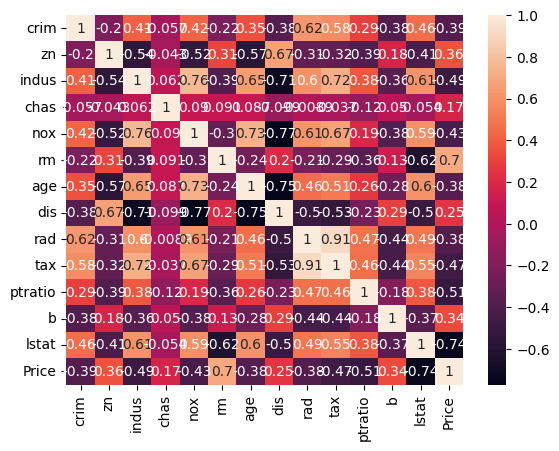

In [11]:
sns.heatmap(dataset.corr(),annot=True)

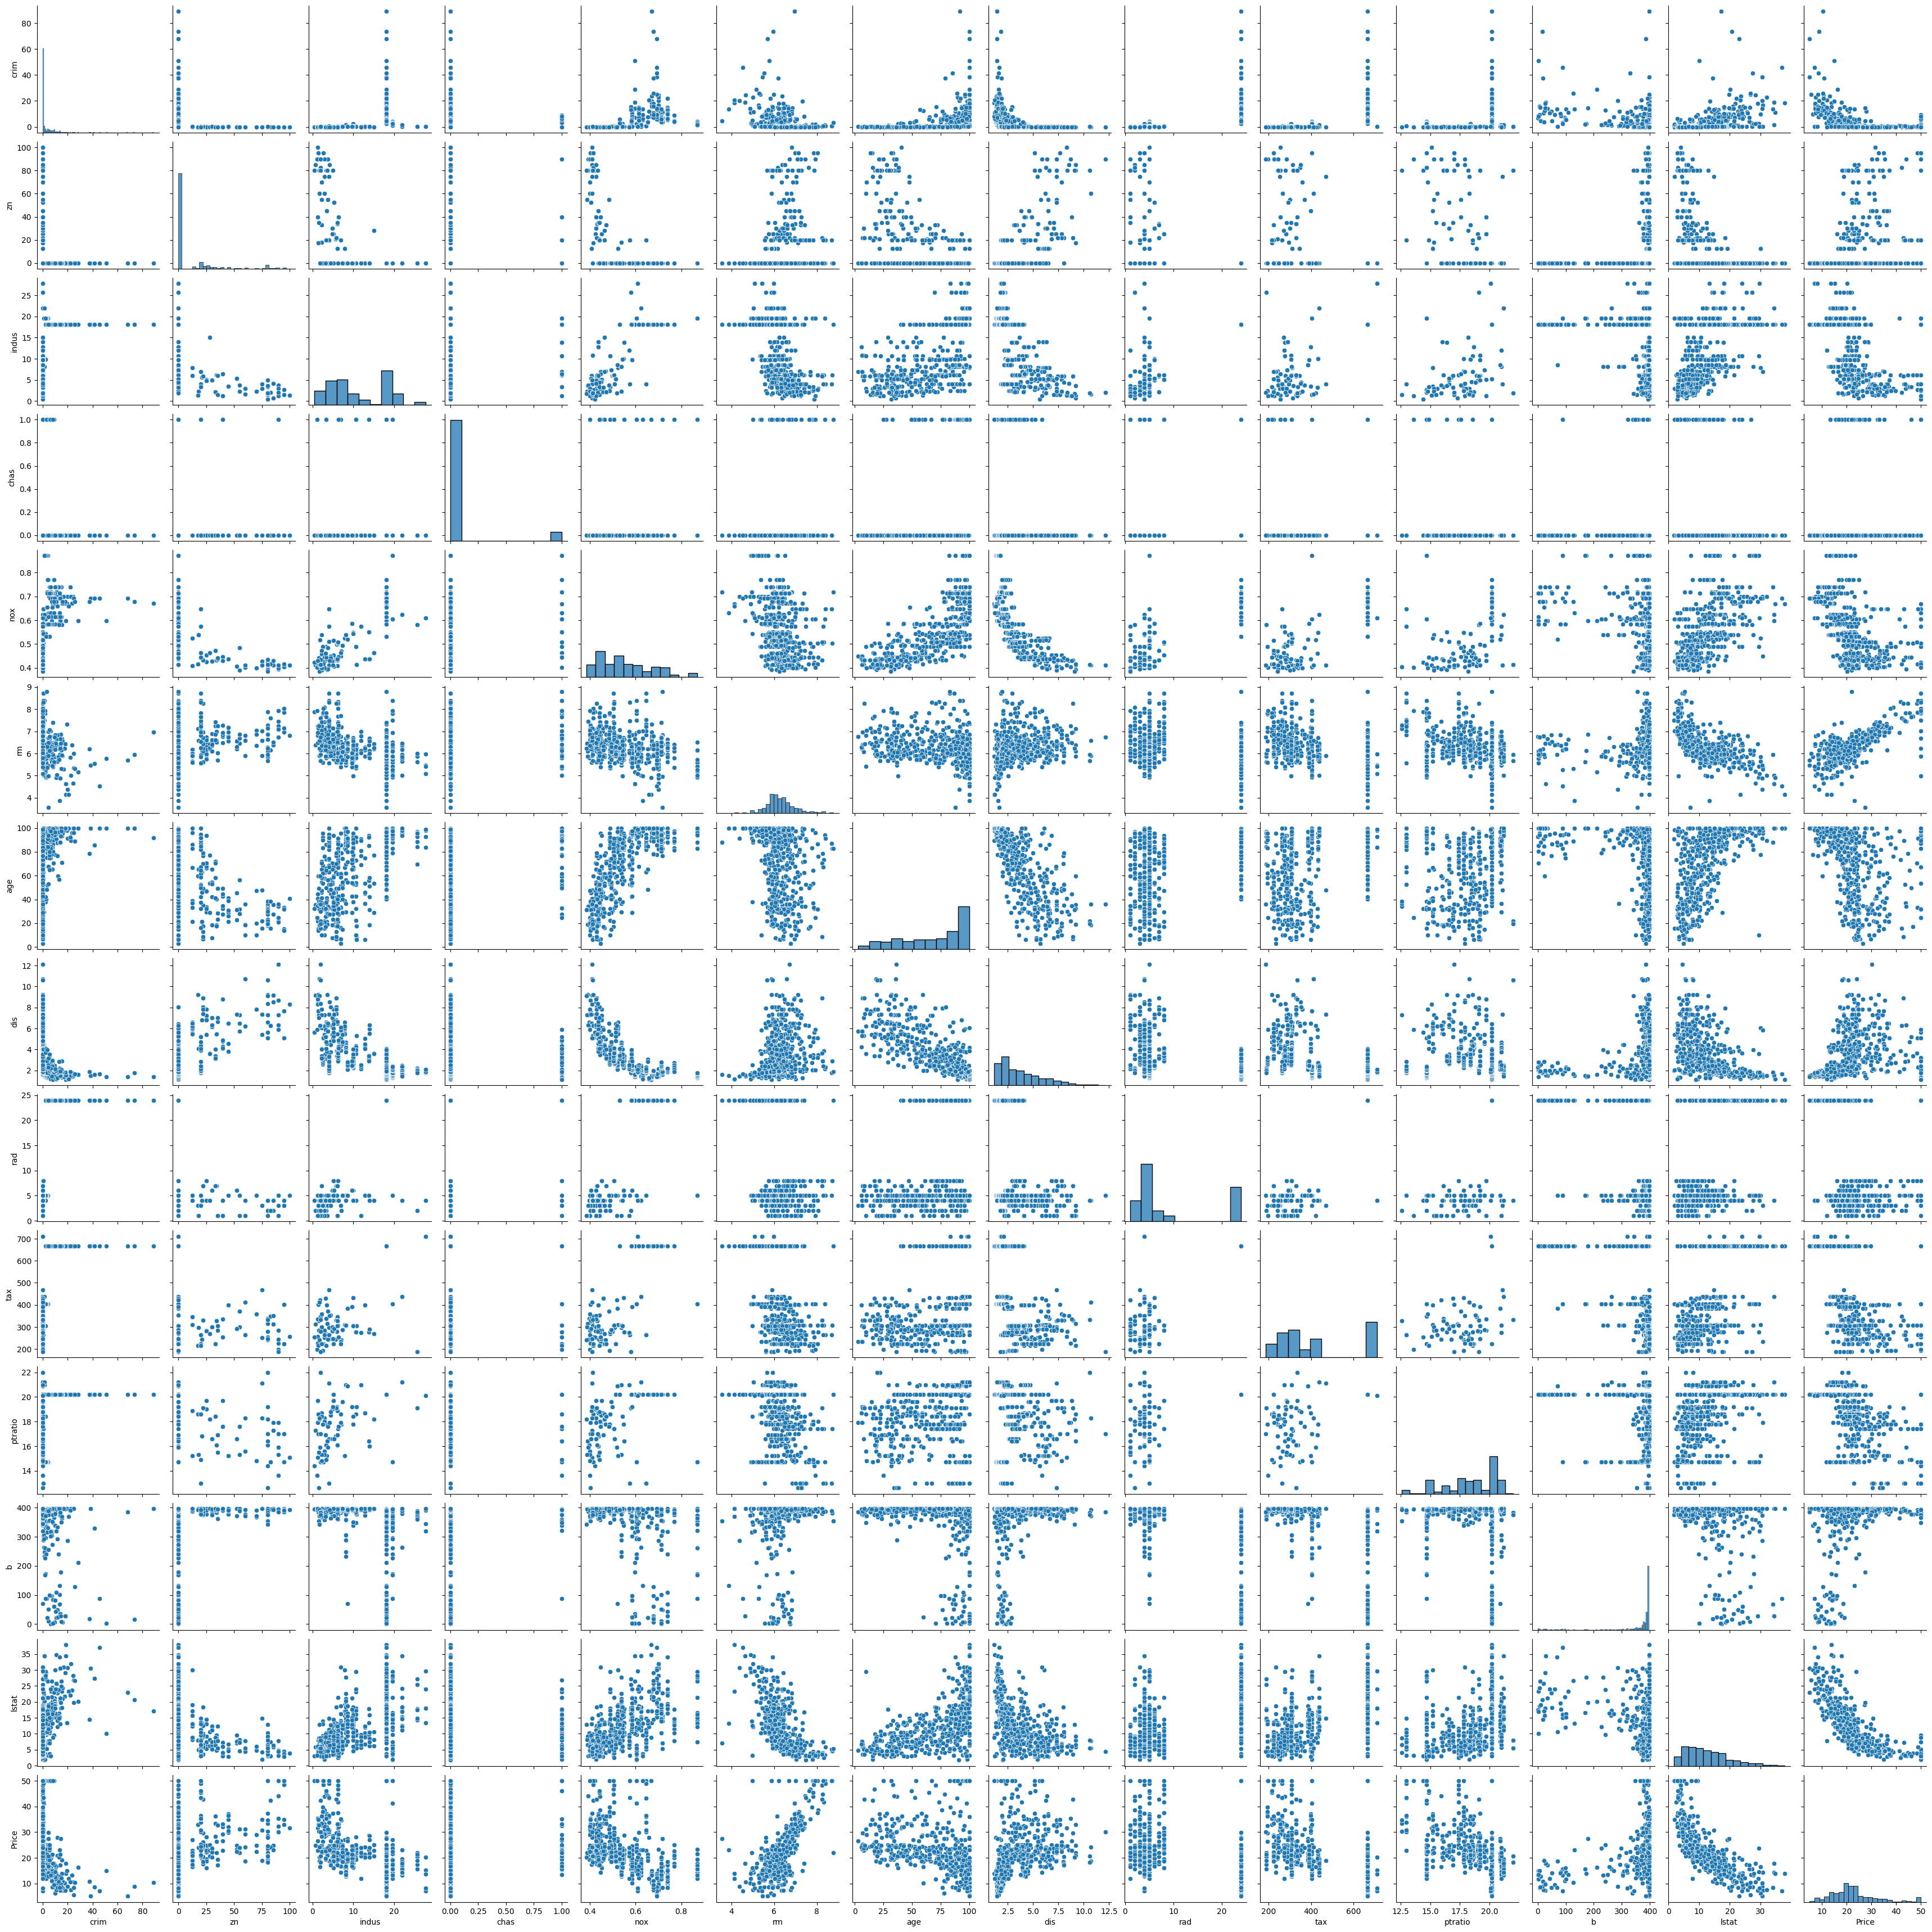

In [12]:
sns.pairplot(dataset)

Text(0, 0.5, 'Price')

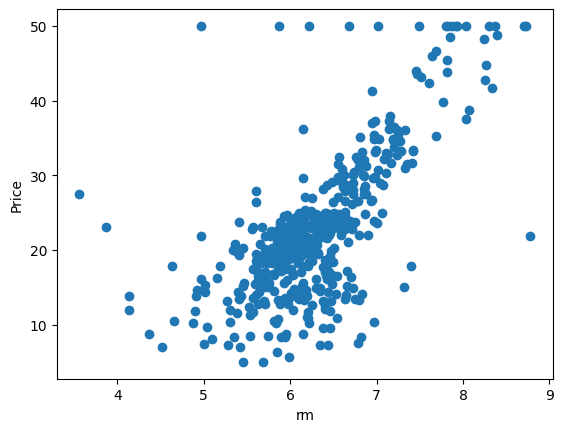

In [13]:
plt.scatter(dataset['rm'],dataset['Price'])
plt.xlabel('rm')
plt.ylabel('Price')

<Axes: xlabel='rm', ylabel='Price'>

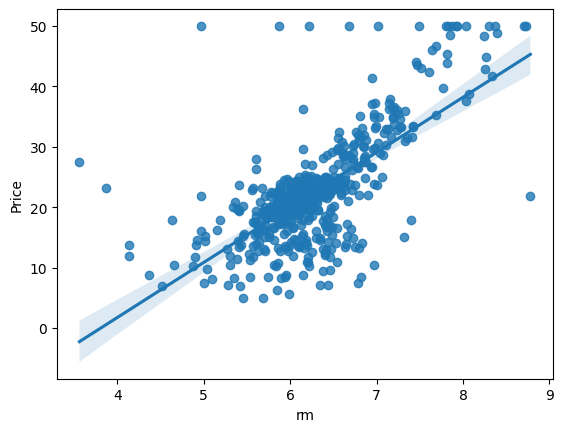

In [14]:
sns.regplot(x='rm',y='Price',data=dataset)

Text(0, 0.5, 'Price')

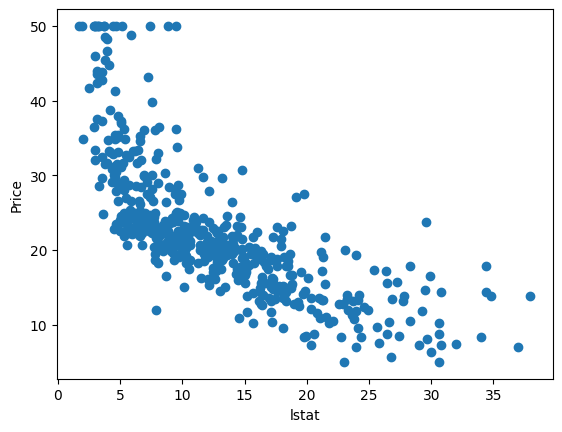

In [15]:
plt.scatter(dataset['lstat'], dataset['Price'])
plt.xlabel('lstat')
plt.ylabel('Price')

<Axes: xlabel='lstat', ylabel='Price'>

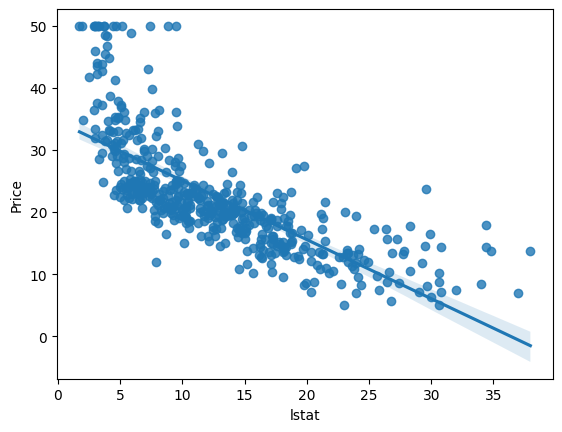

In [16]:
sns.regplot(data=dataset, x='lstat', y='Price')

Text(0, 0.5, 'Price')

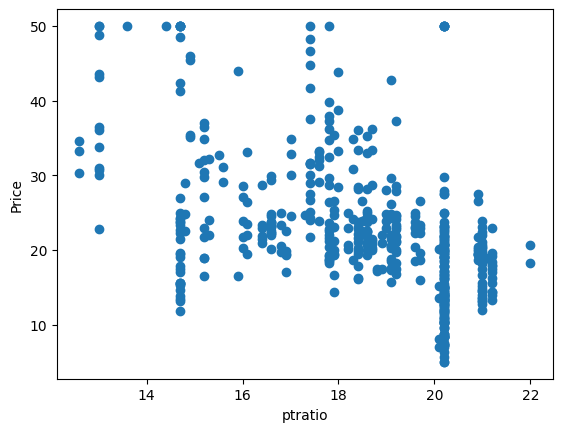

In [17]:
plt.scatter(dataset['ptratio'], dataset['Price'])
plt.xlabel('ptratio')
plt.ylabel('Price')

<Axes: xlabel='ptratio', ylabel='Price'>

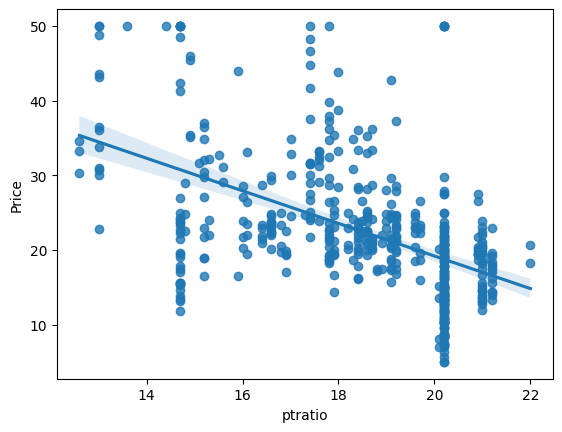

In [18]:
sns.regplot(data=dataset, x='ptratio', y='Price')

##Preparing Data for Training

In [20]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [21]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [22]:
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
scaler = StandardScaler()

In [36]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Train the Model

In [37]:
model = LinearRegression()

In [38]:
model.fit(X_train, y_train)

LinearRegression()

In [39]:
print(model.coef_, model.intercept_)

[-0.81333048  1.25793481  0.55901585  0.62921378 -1.90632294  2.57817719
  0.56191215 -2.87590127  2.74653476 -2.09048251 -2.03201533  1.20544035
 -4.54581734] 22.840285714285717


In [40]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [41]:
model.score(X_train, y_train)

0.7280961761363979

##Predict Test Data

In [42]:
predictions = model.predict(X_test)

In [43]:
r2_score(y_test, predictions)

0.7509342231409275

##Saving the Model

In [45]:
pickle.dump(model, open('model.pkl', 'wb'))

In [46]:
pickle.dump(scaler, open('scaling.pkl', 'wb'))